In [1]:
import numpy as np
import pandas as pd
from math import radians
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

print(f"Train size: {df_train.shape[0]}")
print(f"Test size: {df_test.shape[0]}")

Train size: 20254
Test size: 6966


### Checking data types of features

In [3]:
df_train.dtypes

listing_id                int64
title                    object
address                  object
property_name            object
property_type            object
tenure                   object
built_year              float64
num_beds                float64
num_baths               float64
size_sqft                 int64
floor_level              object
furnishing               object
available_unit_types     object
total_num_units         float64
property_details_url     object
lat                     float64
lng                     float64
elevation                 int64
subzone                  object
planning_area            object
price                   float64
dtype: object

### Checking for correlation between features and 'price'
There's no significant correlation that can be observed

<AxesSubplot:>

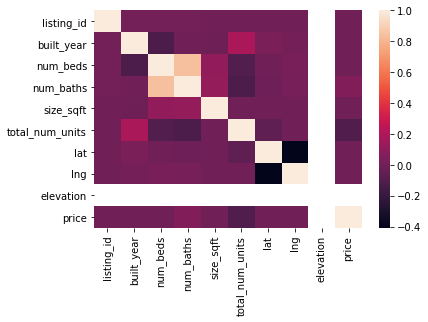

In [4]:
sns.heatmap(df_train.corr())

In [5]:
df_train['elevation'].value_counts()

# it has only value 0, so it can be dropped

0    20254
Name: elevation, dtype: int64

In [6]:
df_train.describe()

# the dataset contains properties with an average of 3 bed rooms and 3 bath rooms

,listing_id,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,elevation,price
count,20254.000000,19332.000000,20174.000000,19820.000000,2.025400e+04,14602.000000,20254.000000,20254.000000,20254.0,2.025400e+04
mean,550763.206428,2010.833695,3.122931,2.643542,1.854364e+03,376.253938,1.434282,103.855356,0.0,5.228263e+06
std,258874.420108,15.822803,1.281658,1.473835,1.354343e+04,346.882474,1.558472,3.593441,0.0,2.779748e+08
min,100043.000000,1963.000000,1.000000,1.000000,0.000000e+00,4.000000,1.239621,-77.065364,0.0,0.000000e+00
25%,326279.000000,2000.000000,2.000000,2.000000,8.070000e+02,106.000000,1.307329,103.806576,0.0,8.190000e+05
50%,551397.000000,2017.000000,3.000000,2.000000,1.119000e+03,296.000000,1.329266,103.841552,0.0,1.680000e+06
75%,774044.500000,2023.000000,4.000000,3.000000,1.528000e+03,561.000000,1.372461,103.881514,0.0,3.242400e+06
max,999944.000000,2028.000000,10.000000,10.000000,1.496000e+06,2612.000000,69.486768,121.023232,0.0,3.924243e+10


In [7]:
df_train[df_train['price']>2.7e8]


# the max value of price appears to be very high compared to the mean, hence we are checking those records 
# with a value greater than standard deviation

# we can see that there are only 2 records which appear to be incorrect as num_beds =1, whereas num_baths = 10
# hence we can drop these two records so that the results are not skewed

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
5976,385586,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,232,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0,sengkang town centre,sengkang,3.924243e+10
16264,287109,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,129,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0,sengkang town centre,sengkang,4.985919e+09


In [8]:
df_train = df_train[df_train['price']<3e8]

In [9]:
df_train.isnull().sum()

listing_id                  0
title                       0
address                     0
property_name               0
property_type               0
tenure                   1723
built_year                922
num_beds                   80
num_baths                 434
size_sqft                   0
floor_level             16744
furnishing                  0
available_unit_types     1441
total_num_units          5650
property_details_url        0
lat                         0
lng                         0
elevation                   0
subzone                   113
planning_area             113
price                       0
dtype: int64

In [10]:
values = {'num_baths':-1,'num_beds':-1}
df_train.fillna(values,inplace=True)

# we temporarily fill missing values in num_beds and num_baths with -1 for the purpose of visualizations

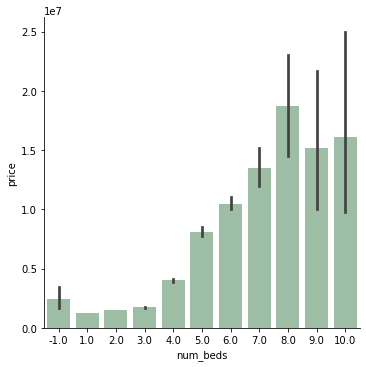

In [11]:
ax = sns.catplot(x='num_beds', y='price',kind='bar', data=df_train, color='#99c2a2')

# a somewhat linear trend can be observed with increase in property price as number of bed rooms increases

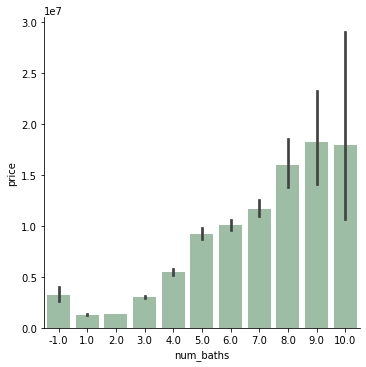

In [12]:
ax = sns.catplot(x='num_baths', y='price',kind='bar', data=df_train, color='#99c2a2')

# however, there doesn't seem to be any trend that can be observed between number of bath rooms and price

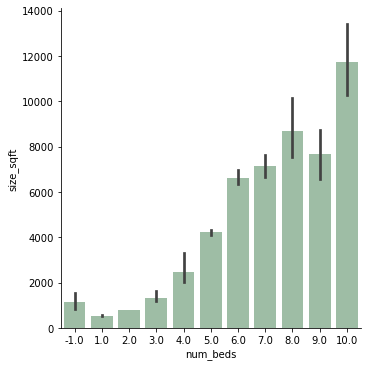

In [13]:
ax = sns.catplot(x='num_beds', y='size_sqft',kind='bar', data=df_train, color='#99c2a2')


# as one would expect as number of bed rooms increases, the house sqft also increases

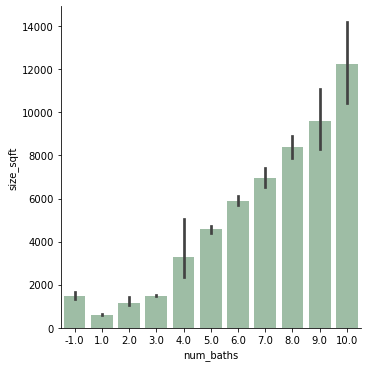

In [14]:
ax = sns.catplot(x='num_baths', y='size_sqft',kind='bar', data=df_train, color='#99c2a2')

# as one would expect as number of bath rooms increases, the house sqft also increases

3044879.7600237015


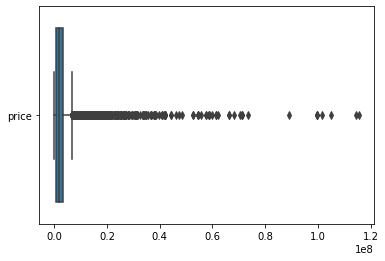

In [15]:
sns.boxplot(data=df_train[["price"]], orient="h")
#Simple Graph Shows Us Amount Of It
pricebef= df_train['price'].mean()
print(pricebef)

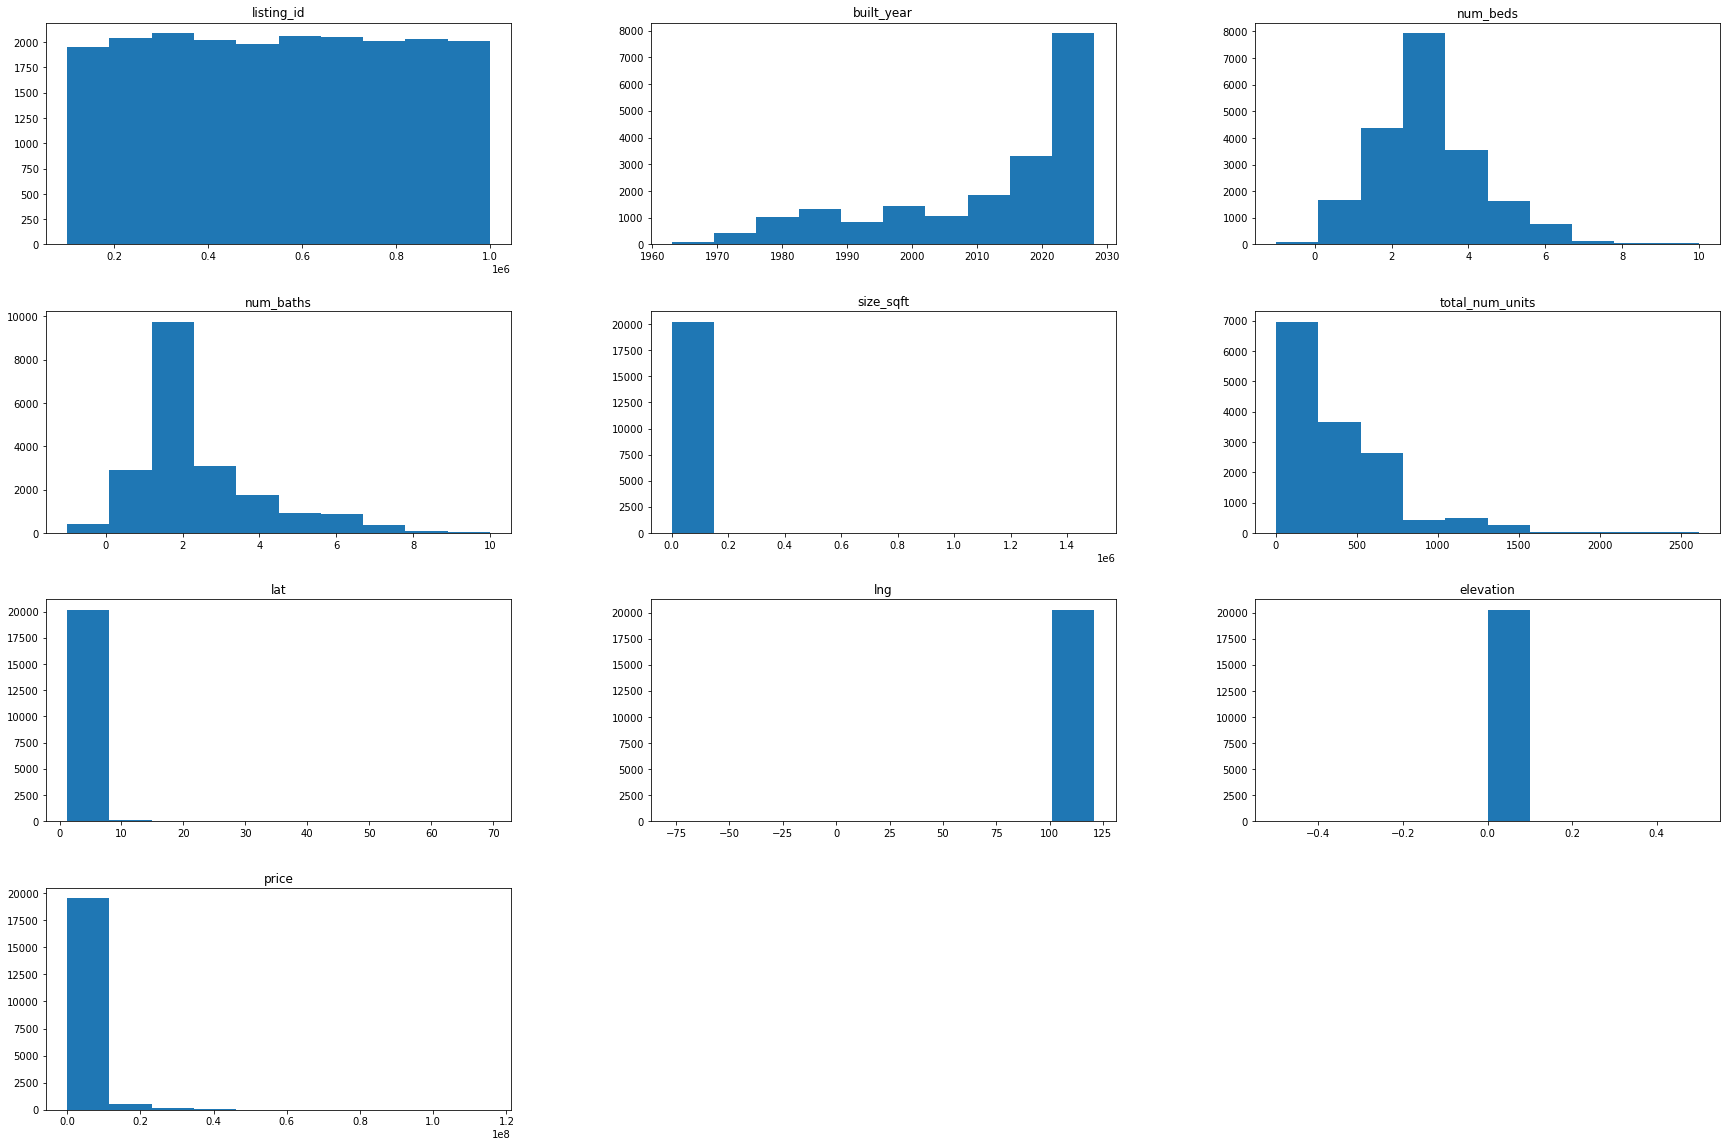

In [16]:
df_train.hist(bins=10, grid = False, figsize=(30,20));

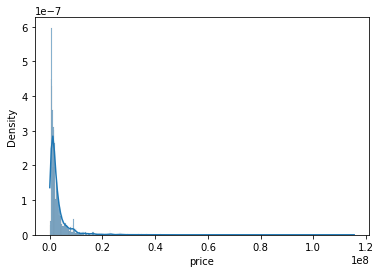

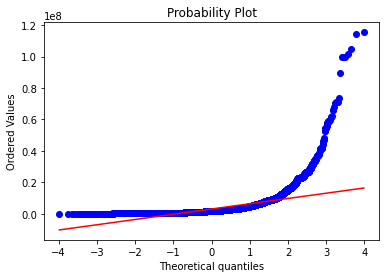

In [17]:
from scipy import stats
sns.histplot(df_train['price'], kde=True, bins='auto', stat = 'density');
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

In [18]:
print("Skewness: %f" % df_train['price'].skew())

Skewness: 7.692937


<AxesSubplot:xlabel='num_beds', ylabel='price'>

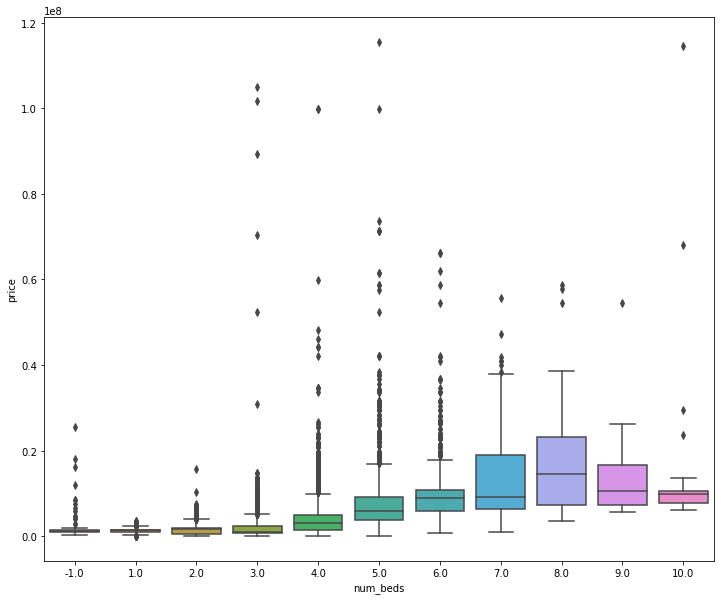

In [19]:
plt.figure(figsize=(12, 10))
sns.boxplot(x="num_beds", y="price", data=df_train)

In [20]:
 #g = sns.pairplot(df_train, hue="price", palette="husl")

In [21]:
#fig = sns.histplot(df_train, x='size_sqft')
#fig.show()

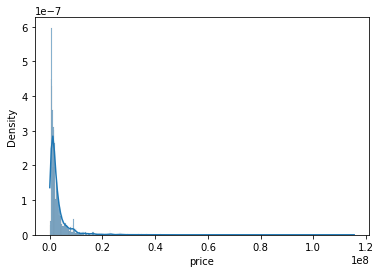

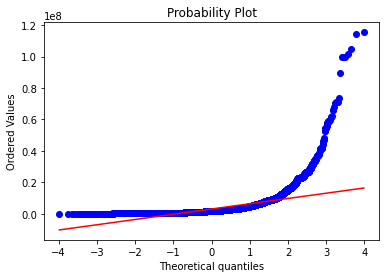

In [22]:
sns.histplot(df_train['price'], kde=True, bins='auto', stat = 'density');
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

In [23]:
#fig = sns.scatterplot(df_train, x='size_sqft', y = 'price')

#Some outliers in size_sqft
#df_train[df_train['size_sqft']> 1e5]

In [24]:
df_train['property_name'].value_counts()

hdb-woodlands           312
leedon green            308
the gazania             287
hyll on holland         285
riviere                 258
                       ... 
756 yishun street 72      1
robertson 100             1
shanghai one              1
606 senja road            1
241 yishun ring road      1
Name: property_name, Length: 2792, dtype: int64

### checking if all listings under a property name have same latitude coordinates

In [25]:
df_leedon = df_train[df_train['property_name']=='leedon green']
df_leedon['lat'].value_counts()

1.312364    308
Name: lat, dtype: int64

In [26]:
df_woodlands = df_train[df_train['property_name']=='riviere']
df_woodlands['lat'].value_counts()

1.30277    258
Name: lat, dtype: int64